In [1]:
import os
import torch
import json
import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')

from pandas.plotting import scatter_matrix
from scipy.spatial import distance
from scipy.stats import percentileofscore



The aim of this notebook is to look at the position of a nearest neighbour in another latent space (constructed with the same data):

- take a vector idx in a latent space A and find its nearest neighbour (nn)
- calculate the distance between idx and nn in a latent space B. (B is supposed to contain the representation of the same elements than in A.)
- rank nn in terms of distance to idx in B (it is first if it is still the closest to idx in B and last if it is the furthest)
- do stats on that

This is a proxy to see if the structure of a latent space is conserved from one to another (a couple of points that are close in a latent space souldn't be too far in the other one).

To use this notebook, you have to set up the paths to the csv files in the next code cell, then you can just Run All.

# Load the data

In [2]:
def load_embeddings(path1, path2, verbose=False):    
    # load embeddings
    embeddings1 = pd.read_csv(path1, index_col=0)
    embeddings2 = pd.read_csv(path2, index_col=0)

    if verbose:
        print(embeddings1.head())
        print(embeddings2.head())

        print((embeddings1.index == embeddings2.index).all())

    return embeddings1, embeddings2

# choose models by hand
#dir_path = "/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders/pca/4"
#path1 = dir_path + "/Run1/pca_embeddings.csv"
#path2 = dir_path + "/Run2/pca_embeddings.csv"

# choose random models with same conditions
def choose_random_models(dir_path):
    list_models = [file for file in os.listdir(dir_path) if os.path.isdir(os.path.join(dir_path,file))]
    mod1, mod2 = rd.choice(list_models, size=2, replace=False)
    mod1, mod2 = np.sort([mod1, mod2])
    print("chosen_models", mod1, mod2)
    return mod1, mod2


dir_path = "/neurospin/dico/agaudin/Runs/03_monkeys/Output/analysis_folders"
model_type = 'convnet'
conditions = 'no_foldlabel_30'
full_dir_path = os.path.join(dir_path, model_type, conditions)


mod1, mod2 = choose_random_models(full_dir_path)


## store the graphs and values (or not)
#save_path = None

save_path = os.path.join(dir_path, "performance_comparisons/nn", model_type+'_'+conditions)
if not os.path.exists(save_path):
    os.mkdir(save_path)


# don't do twice the same thing
if save_path:
    while os.path.exists(os.path.join(save_path, mod1+'_'+mod2+".png")):
        mod1, mod2 = choose_random_models(full_dir_path)


path1 = os.path.join(full_dir_path, mod1, "cingulate_ACCpatterns_embeddings/full_embeddings.csv")
path2 = os.path.join(full_dir_path, mod2, "cingulate_ACCpatterns_embeddings/full_embeddings.csv")


embeddings1, embeddings2 = load_embeddings(path1, path2, verbose=True)

chosen_models 13-53-05 2022-07-05
chosen_models 12-13-53 2022-07-05
chosen_models 13-53-05 2022-07-05
chosen_models 12-13-53 16-39-35
                   dim1       dim2       dim3       dim4       dim5  \
ID                                                                    
1-15LEHMI_t0  -3.106737  15.666863  34.566290 -20.741875  -3.008652   
1-17COLMA_t0  17.905102  33.228542  44.539610 -11.477754 -27.239576   
1-18ROUCO_t0   8.884191 -13.133539  38.917442 -46.770126 -39.279650   
1-40AYMJU_t0 -49.110950  25.351582  50.326940  -5.353231  31.442883   
2-02FERMA_t0 -22.501413   9.310878  20.961409  27.151762  10.515693   

                   dim6       dim7       dim8       dim9      dim10  ...  \
ID                                                                   ...   
1-15LEHMI_t0  -6.544771   5.442918  -2.445371  17.019943  35.347150  ...   
1-17COLMA_t0 -19.297874  19.854305 -14.424307  32.754593  21.591639  ...   
1-18ROUCO_t0 -35.932210 -11.145417 -41.029200   7.988632   3.357

# Plot the scatter matrices of the two df

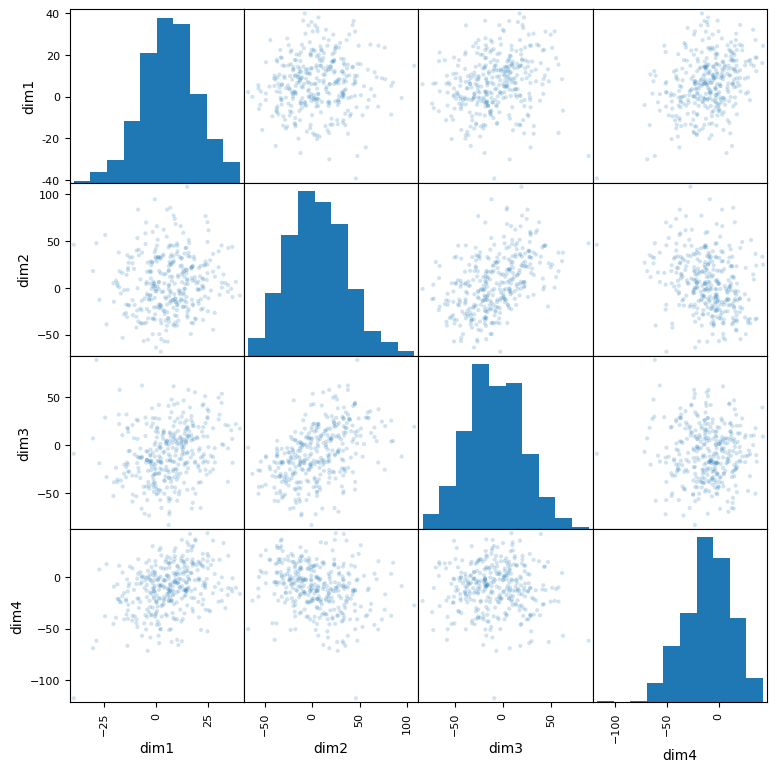

In [2093]:
sm1 = scatter_matrix(embeddings1[["dim1", "dim2", "dim3", "dim4"]], alpha=0.2, figsize=(9,9))

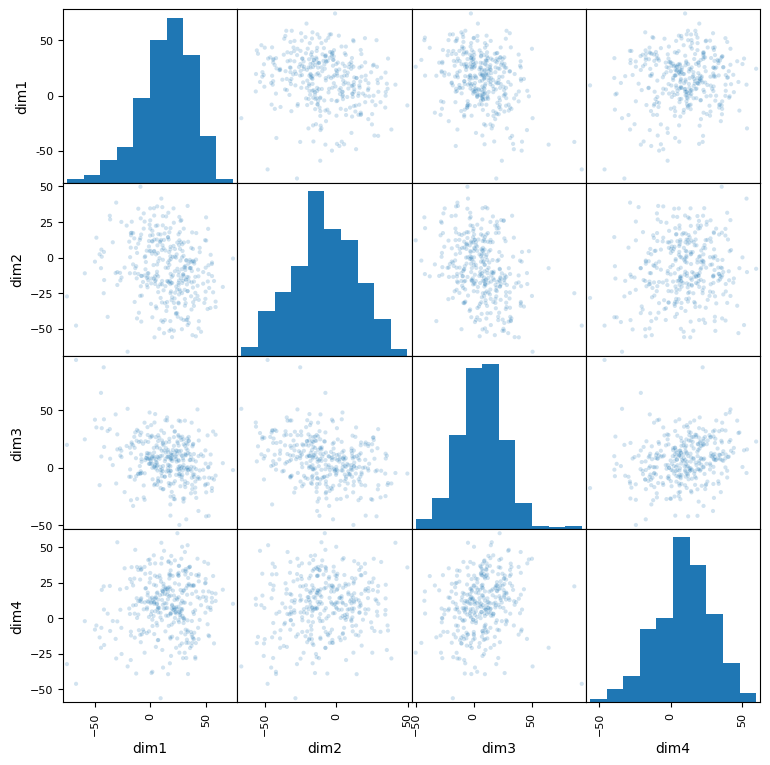

In [2094]:
sm2 = scatter_matrix(embeddings2[["dim1", "dim2", "dim3", "dim4"]], alpha=0.2, figsize=(9,9))

# Get the nearest neighbour

In [2095]:
# tests distance.euclidian
line1 = embeddings1.iloc[1,:]
line2 = embeddings1.iloc[2,:]
print(line1)
print(line2)

print(distance.euclidean(line1, line2))

embeddings1.apply(distance.euclidean, axis=1, args=[np.array(line1)])

dim1     24.544453
dim2     48.986996
dim3     28.081356
dim4     22.880680
dim5     -2.515738
dim6    -26.301266
dim7     31.477337
dim8     28.267841
dim9     23.692268
dim10    -8.983002
dim11    46.147200
dim12    32.701984
dim13    -0.213919
dim14   -36.879856
dim15    -7.554704
dim16    13.580231
dim17     5.253570
dim18   -21.072090
dim19    11.547763
dim20     9.680553
dim21    42.425484
dim22    -9.413590
dim23   -53.376534
dim24     6.185026
dim25   -32.438780
dim26   -10.729375
dim27   -23.891499
dim28     6.520802
dim29    14.888876
dim30     6.888648
Name: 1-17COLMA_t0, dtype: float64
dim1     34.482056
dim2     42.547256
dim3     20.570915
dim4     21.019205
dim5     29.827015
dim6     16.841099
dim7    -22.690617
dim8     58.599760
dim9    -17.827140
dim10   -40.109512
dim11    -7.493585
dim12    23.471992
dim13    21.486774
dim14    -5.732817
dim15    27.952906
dim16     1.360217
dim17    16.515858
dim18    36.766777
dim19    23.931185
dim20    -5.459281
dim21    -1.861

ID
1-15LEHMI_t0                            141.646722
1-17COLMA_t0                              0.000000
1-18ROUCO_t0                            167.191067
1-40AYMJU_t0                            182.531708
2-02FERMA_t0                            190.711094
                                           ...    
sub-inhibition10_ses-pretraining_T1w    184.093631
sub-inhibition14_ses-pretraining_T1w    226.346026
sub-inhibition23_ses-pretraining_T1w    165.107460
sub-inhibition28_ses-pretraining_T1w    152.218340
sub-inhibition31_ses-pretraining_T1w    235.649256
Length: 341, dtype: float64

In [2096]:
# get the nearest neighbour of a line of the dataset df
# returns the label of the nn and its distance to the line
def get_nearest_neighbour(line, df, dist=distance.euclidean):
    idx = line.name
    df_without_line = df[df.index != idx]
    distances = df_without_line.apply(dist, axis=1, args=[np.array(line)]).to_frame()
    nn = distances.idxmin()[0]
    min_dist = distances[0][nn]
    return [nn, min_dist]

In [2097]:
get_nearest_neighbour(line1, embeddings1)

['a0008_t1_s03', 91.62080465999374]

In [2098]:
# get the nearest neighbours and their distance for the first run

nearest_neighbours1 = embeddings1.apply(get_nearest_neighbour, axis=1, result_type='expand', 
                                          args=[embeddings1])
embeddings1['nn'] = nearest_neighbours1[0]
embeddings1['min_dist'] = nearest_neighbours1[1]
embeddings1

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,nn,min_dist
ID,,,,,,,,,,,,,,,,,,,,,
1-15LEHMI_t0,2.154185,32.022854,1.647529,0.646991,-23.487795,-57.143353,-11.232943,26.274235,11.953315,-11.645276,...,-25.755411,-6.761451,-2.515769,-55.127563,1.229451,-11.479473,-40.659424,-20.071964,sub-active07_ses-pretraining_T1w,93.335932
1-17COLMA_t0,24.544453,48.986996,28.081356,22.880680,-2.515738,-26.301266,31.477337,28.267841,23.692268,-8.983002,...,-53.376534,6.185026,-32.438780,-10.729375,-23.891499,6.520802,14.888876,6.888648,a0008_t1_s03,91.620805
1-18ROUCO_t0,34.482056,42.547256,20.570915,21.019205,29.827015,16.841099,-22.690617,58.599760,-17.827140,-40.109512,...,-27.528046,16.721127,-39.279205,-3.662747,-23.143522,-27.294140,-14.150434,-3.802364,sub-active19_ses-pretraining_T1w,69.044652
1-40AYMJU_t0,-14.073219,13.840046,32.218300,-36.208317,-37.418250,-90.022410,23.074072,3.092813,36.461403,-1.705332,...,-22.166319,-29.450043,21.396833,-2.651529,1.055947,48.313440,-11.586653,-46.878370,sub-inhibition25_ses-pretraining_T1w,84.445534
2-02FERMA_t0,11.185219,33.164375,-48.045140,-9.283048,-4.204134,-12.091037,2.111330,-36.164085,-18.258465,-8.620414,...,-3.251365,-28.651396,44.378520,-3.208726,26.491617,-5.988509,-20.748798,3.000662,sub-active13_ses-pretraining_T1w,68.107770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-inhibition10_ses-pretraining_T1w,22.568240,9.221014,9.379587,-21.631273,12.806232,13.275368,-8.088248,32.508736,14.434551,-3.237656,...,-1.386101,-20.274124,-22.527868,72.161150,-12.897935,21.356583,13.780126,8.910207,nih_chp_04767_t1,63.749044
sub-inhibition14_ses-pretraining_T1w,21.403051,-12.151491,-38.528290,-16.284695,21.302778,13.385019,-33.953705,26.426132,40.768920,15.064915,...,16.931837,17.434109,-31.403492,31.487850,-4.012979,7.404892,1.585852,26.556128,nih_chp_04145_t1,84.567713
sub-inhibition23_ses-pretraining_T1w,13.196310,-19.789785,46.871674,14.952064,21.364285,-31.655346,-17.316010,45.194252,14.836115,1.654385,...,-28.720300,46.366180,-21.873526,11.496380,-26.371246,25.674541,0.411529,-28.539318,a0020_t1_s03,80.769483


In [2099]:
# get the nearest neighbours and their distance for the second run

nearest_neighbours2 = embeddings2.apply(get_nearest_neighbour, axis=1, result_type='expand',
                                          args=[embeddings2])
embeddings2['nn'] = nearest_neighbours2[0]
embeddings2['min_dist'] = nearest_neighbours2[1]
embeddings2

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,nn,min_dist
ID,,,,,,,,,,,,,,,,,,,,,
1-15LEHMI_t0,-17.492723,15.666286,-28.401798,-12.246755,1.915853,-2.078917,43.917480,-9.634559,35.146027,-29.232624,...,3.146345,3.066736,12.545019,-6.766249,2.333178,6.802473,-11.798768,0.818626,sub-active07_ses-pretraining_T1w,90.366363
1-17COLMA_t0,32.247620,-2.108364,-44.982410,-17.454863,1.417025,1.032981,29.805372,9.528182,16.209805,-7.643181,...,-7.000801,-24.682660,38.464980,-4.913857,7.643056,-14.664153,-7.039487,-2.842804,nih_chp_00501_t1,88.144372
1-18ROUCO_t0,39.438644,-4.216570,-6.004874,-10.285994,-35.628030,-32.503450,9.693334,40.830290,8.639039,48.417656,...,16.903610,-33.602730,20.262459,-36.560947,-1.855579,-24.664478,9.123178,7.810584,sub-active02_ses-pretraining_T1w,80.346353
1-40AYMJU_t0,-30.821856,38.652344,-13.872334,-28.463717,27.056509,48.467407,26.317000,-5.891163,2.088883,-56.740295,...,-5.196018,14.511038,6.319133,56.318516,41.907280,66.052350,33.918423,-5.373232,sub-inhibition25_ses-pretraining_T1w,99.025704
2-02FERMA_t0,16.399101,12.708512,9.123508,40.269690,36.522564,-7.374204,-9.725206,-11.745266,1.043786,24.154526,...,32.160570,0.046462,15.194151,3.872752,11.972863,29.794516,6.509133,-9.704853,nih_chp_05376_t1,67.263915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sub-inhibition10_ses-pretraining_T1w,34.544796,-46.003650,26.541115,24.183350,-32.651665,-54.434814,0.092569,33.691330,11.005363,57.020400,...,1.712615,3.185345,-6.286001,-20.842194,-12.685097,-6.438769,-3.241511,-6.797113,nih_chp_04939_t1,84.175692
sub-inhibition14_ses-pretraining_T1w,58.653630,-30.962868,-7.048202,12.163979,-14.504553,-20.636585,6.579939,-23.475610,5.508135,50.135370,...,10.247342,13.691397,1.097897,-27.763996,-55.230080,-35.836014,-39.709480,18.395237,sub-active22_ses-pretraining_T1w,79.557528
sub-inhibition23_ses-pretraining_T1w,19.515762,-27.928822,7.212932,-13.070925,-45.271484,12.986469,8.409663,10.125968,-23.090988,-12.568117,...,7.013453,-11.896649,-3.008841,34.901430,13.890041,-47.652680,-12.519256,6.392896,nih_chp_01967_t1,103.857772


In [2100]:
"""# save embeddings 1 and 2 as csv files
embeddings1.to_csv("embeddings_05-10.csv")
embeddings2.to_csv("embeddings_05-11.csv")"""

'# save embeddings 1 and 2 as csv files\nembeddings1.to_csv("embeddings_05-10.csv")\nembeddings2.to_csv("embeddings_05-11.csv")'

# Get distance matrices

In [2101]:
def get_distance_matrix(emb, verbose=False):
    # emb should not have the nn nor the min_dist columns    
    dist_mat = pd.DataFrame()

    for idx in emb.index:
        line = emb[emb.index == idx]
        if verbose:
            print(line)
        distances = emb.apply(distance.euclidean, axis=1, args=[np.array(line)])
        dist_mat[idx] = distances

    return dist_mat

In [2102]:
# reload the original files for them not to have the 'nn' and 'min_dist' columns
#embeddings1, embeddings2 = load_embeddings()

# generate the distance matrices
dist_mat1 = get_distance_matrix(embeddings1[["dim1", "dim2", "dim3", "dim4"]])
dist_mat2 = get_distance_matrix(embeddings2[["dim1", "dim2", "dim3", "dim4"]])

# save the distance matrices
# dist_mat1.to_csv("distance_mat_05-10.csv")
# dist_mat2.to_csv("distance_mat_05-11.csv")

# NN analysis

In [2103]:
"""# load the tables with the 'nn' and 'min_dist' columns
embeddings1 = pd.read_csv("embeddings_05-10.csv", index_col=0)
embeddings2 = pd.read_csv("embeddings_05-11.csv", index_col=0)"""

'# load the tables with the \'nn\' and \'min_dist\' columns\nembeddings1 = pd.read_csv("embeddings_05-10.csv", index_col=0)\nembeddings2 = pd.read_csv("embeddings_05-11.csv", index_col=0)'

### Calculate the proportion of nn that are still nn in the other latent space

In [2104]:
def nearest_neighbours_conservation(emb1, emb2):
    # emb1 and emb2 should contain the nn column already
    if False in (emb1.index == emb2.index):
        raise ValueError("emb1 and emb2 should contain the same elements")
    else:
        same_nn = (emb1.nn == emb2.nn)
        return same_nn, same_nn.mean()
        

In [2105]:
same_nn, ratio = nearest_neighbours_conservation(embeddings1, embeddings2)
# ratio of vectors that keep their nn
print(same_nn.sum(),"elements,",ratio*100, "% of the dataset")


56 elements, 16.422287390029325 % of the dataset


In [2106]:
# list of vectors that keep their nn (+ their nn in the 2nd column)
embeddings1[same_nn != True]['nn']

ID
1-17COLMA_t0                                                a0008_t1_s03
1-18ROUCO_t0                            sub-active19_ses-pretraining_T1w
2-02FERMA_t0                            sub-active13_ses-pretraining_T1w
2-04HEBTO_t0                                                e0079_t1_s03
2-09MORJU_t0                                            nih_chp_04452_t1
                                                      ...               
sub-inhibition10_ses-pretraining_T1w                    nih_chp_04767_t1
sub-inhibition14_ses-pretraining_T1w                    nih_chp_04145_t1
sub-inhibition23_ses-pretraining_T1w                        a0020_t1_s03
sub-inhibition28_ses-pretraining_T1w    sub-active08_ses-pretraining_T1w
sub-inhibition31_ses-pretraining_T1w                    nih_chp_04745_t1
Name: nn, Length: 285, dtype: object

### Visualisation of single nearest neighbour position in the other latent space

rand_idx nih_chp_05662_t1
nearest_neighbours: nih_chp_02091_t1 a0033_t1_s03

2.0527859237536656%, 7-th element


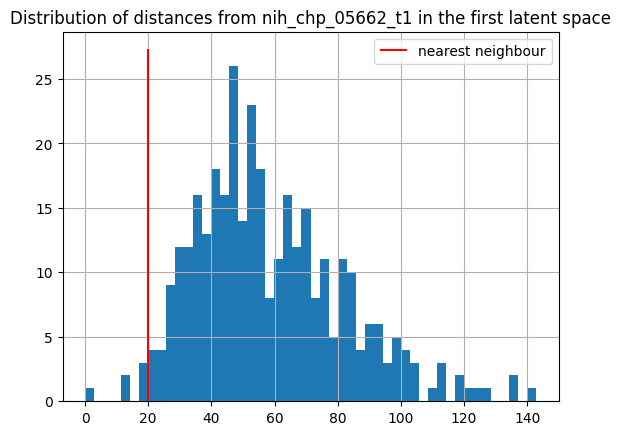

5.865102639296188%, 20-th element


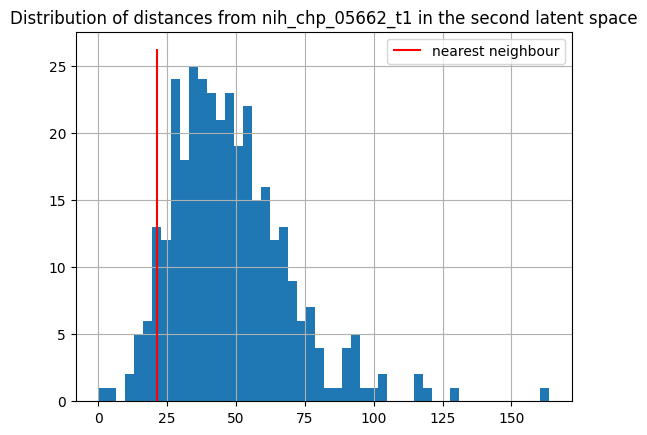

In [2107]:
# choose a random index
rand_idx = rd.choice(embeddings1.index)
print("rand_idx", rand_idx)

# get the nn of rand_idx for both latent spaces
nn1 = str(embeddings1.nn[rand_idx])
nn2 = str(embeddings2.nn[rand_idx])
print("nearest_neighbours:", nn1, nn2)
print()

# get the distances from rand_idx in the first latent space
dist2nn1 = dist_mat1[str(rand_idx)]
dist2nn1.hist(bins=50)
dist1 = dist2nn1[nn2]  # distance of nn2 in the first latent space
# calculate the percentile of dist(rand_idx, nn2) in the first latent space
percentile = percentileofscore(dist2nn1, dist1)
print(f'{percentile}%,', f'{int(percentile*len(dist2nn1)/100)}-th element')
# plot the distance distribution
ax = plt.gca()
ymin, ymax = ax.get_ylim()
plt.vlines(dist1, ymin=ymin, ymax=ymax, colors='red') # show position of nn in the other
                                                      # latent space
plt.title(f"Distribution of distances from {rand_idx} in the first latent space")
plt.legend(["nearest neighbour"])
plt.show()

# same thing for the second latent space (and nn1)
plt.figure()
dist2nn2 = dist_mat2[str(rand_idx)]
dist2nn2.hist(bins=50)
dist2 = dist2nn2[nn1]
percentile = percentileofscore(dist2nn2, dist2)
print(f'{percentile}%,', f'{int(percentile*len(dist2nn2)/100)}-th element')
ax = plt.gca()
ymin, ymax = ax.get_ylim()
plt.vlines(dist2, ymin=ymin, ymax=ymax, colors='red')
plt.title(f"Distribution of distances from {rand_idx} in the second latent space")
plt.legend(["nearest neighbour"])
plt.show()

### Average percentile of nn in the other latent space

In [2108]:
def get_percentile(distance_distrib_a, embeddings_b):
# distance_distrib_a is the distance distribution of idx in the latent space a, ie a column 
# (or line) of the associated dist_mat
    idx = distance_distrib_a.name
    nn = embeddings_b.nn[idx] ## nn is the nearest neighbour of idx in the latent space b
    
    dist_a = distance_distrib_a[str(nn)]
    percentile = percentileofscore(distance_distrib_a, dist_a)
    
    return percentile

In [2109]:
# function test


distance_distrib = dist_mat1['1-03HUBJO_t0']  # pick an element
print(get_percentile(distance_distrib, embeddings2))

dist_mat1.apply(get_percentile, axis=0, args=[embeddings2])

23.46041055718475


1-15LEHMI_t0                             0.879765
1-17COLMA_t0                             1.759531
1-18ROUCO_t0                             1.466276
1-40AYMJU_t0                             0.586510
2-02FERMA_t0                             7.038123
                                          ...    
sub-inhibition10_ses-pretraining_T1w     6.451613
sub-inhibition14_ses-pretraining_T1w    42.228739
sub-inhibition23_ses-pretraining_T1w     5.278592
sub-inhibition28_ses-pretraining_T1w    24.633431
sub-inhibition31_ses-pretraining_T1w     7.331378
Length: 341, dtype: float64

In [2110]:
def get_average_percentile(dist_mat1, dist_mat2, emb1, emb2):
# computes the average percentile a nn is sent to in the other latent space
    average_percentile_a = dist_mat1.apply(get_percentile, axis=0, args=[emb2]).mean()
    average_percentile_b = dist_mat2.apply(get_percentile, axis=0, args=[emb1]).mean()
    return (average_percentile_a + average_percentile_b) / 2

In [2111]:
average_percentile = get_average_percentile(dist_mat1, dist_mat2, embeddings1, embeddings2)
print(f'{average_percentile}%,', f'{average_percentile*550/100}-th element')

17.11156594800526%, 94.11361271402893-th element


### Position stats of nn in the other latent space

In [2112]:
def get_nn_stats(dist_mat1, dist_mat2, emb1, emb2):
    percentiles_a = dist_mat1.apply(get_percentile, axis=0, args=[emb2])
    percentiles_b = dist_mat2.apply(get_percentile, axis=0, args=[emb1])
    mean_a = percentiles_a.mean()
    mean_b = percentiles_b.mean()
    std_a = percentiles_a.std()
    std_b = percentiles_b.std()
    
    percentiles = pd.concat([percentiles_a, percentiles_b], axis=0, ignore_index=True)
    med = percentiles.median()
    first_quartile = percentiles.quantile(0.25)
    third_quartile = percentiles.quantile(0.75)

    nn_stats = {'mean': (mean_a + mean_b) / 2,
                'standard deviation': (std_a + std_b) / 2,
                'median': med,
                'first quartile': first_quartile,
                'third quartile': third_quartile}
    
    return nn_stats


In [2113]:
get_nn_stats(dist_mat1, dist_mat2, embeddings1, embeddings2)

{'mean': 17.11156594800526,
 'standard deviation': 17.300379765833345,
 'median': 10.997067448680351,
 'first quartile': 4.39882697947214,
 'third quartile': 24.266862170087975}

### Histogram of position of nn in the other latent space


In [2114]:
def get_percentile_histograms(dist_mat1, dist_mat2, emb1, emb2, separate=False,
                              show_average=False, show_median=True, vlines_width=0.5,
                              save_path=None):
    
    percentiles_a = dist_mat1.apply(get_percentile, axis=0, args=[emb2])
    percentiles_b = dist_mat2.apply(get_percentile, axis=0, args=[emb1])

    if separate:
        # compute the histogram
        percentiles_a.hist(bins=range(101), color='red')
        legend = []
        ax = plt.gca()
        ymin, ymax = ax.get_ylim()
        if show_average:
            average = percentiles_a.mean()
            plt.vlines(average, ymin, ymax, color='black', 
                       linewidth=vlines_width)
            legend.append('Mean')
        if show_median:
            med = percentiles_a.median()
            plt.vlines(med,  ymin, ymax, color='blue', 
                       linewidth=vlines_width)
            legend.append('Median')
        plt.legend(legend)
        plt.title("Distribution of positions of nn2 in the latent space 1")

        plt.figure()
        percentiles_b.hist(bins=range(101), color='red')
        legend = []
        ax = plt.gca()
        ymin, ymax = ax.get_ylim()
        if show_average:
            average = percentiles_b.mean()
            plt.vlines(average, ymin, ymax, color='black', 
                       linewidth=vlines_width)
            legend.append('Mean')
        if show_median:
            med = percentiles_b.median()
            plt.vlines(med,  ymin, ymax, color='blue', 
                       linewidth=vlines_width)
            legend.append('Median')
        plt.legend(legend)
        plt.title("Distribution of positions of nn1 in the latent space 2")

    
    else:
        percentiles = pd.concat([percentiles_a, percentiles_b], axis=0, ignore_index=True)
        percentiles.hist(bins=range(101), color='red')
        legend = []
        ax = plt.gca()
        ymin, ymax = ax.get_ylim()
        if show_average:
            average = percentiles.mean()
            plt.vlines(average, ymin, ymax, color='black', 
                       linewidth=vlines_width)
            legend.append('Mean')
        if show_median:
            med = percentiles.median()
            plt.vlines(med,  ymin, ymax, color='blue', 
                       linewidth=vlines_width)
            legend.append('Median')
        plt.legend(legend)
        plt.title("Distribution of positions of nn in the other latent space")
        if save_path:
            plt.savefig(save_path)
    

16-39-35 2022-07-05
{'mean': 17.11156594800526, 'standard deviation': 17.300379765833345, 'median': 10.997067448680351, 'first quartile': 4.39882697947214, 'third quartile': 24.266862170087975}


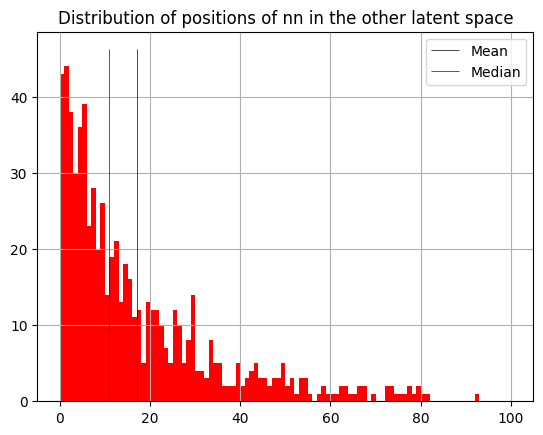

In [2129]:
#get_percentile_histograms(dist_mat1, dist_mat2, embeddings1, embeddings2, separate=True,
#show_average=True)

print(mod1, mod2)
fig_save_path = os.path.join(save_path, mod1+'_'+mod2+".png")
values_save_path = os.path.join(save_path, mod1+'_'+mod2+".txt")


plt.figure()
get_percentile_histograms(dist_mat1, dist_mat2, embeddings1, embeddings2, separate=False,
show_average=True, save_path=fig_save_path)

nn_stats = get_nn_stats(dist_mat1, dist_mat2, embeddings1, embeddings2)
print(nn_stats)


## save figure if wanted
if save_path:
    with open(values_save_path, 'w') as file:
        json.dump(nn_stats, file)

### Save the space nn distance for each model type and conditions

In [2144]:
"""# compute the mean score of all of them

saved_path = os.path.join(dir_path, "performance_comparisons/nn")

mod_conds = [folder for folder in os.listdir(saved_path) if os.path.isdir(os.path.join(saved_path,folder))]

nn_mean = np.zeros((len(mod_conds)//2, 2))

for folder in mod_conds:
    j = 0 if 'convnet' in folder else 1
    if "no" in folder:
        i = 2
    else:
        i = 0
    if '4' in folder:
        i += 1
    
    median_values = []
    for file in os.listdir(os.path.join(saved_path,folder)):
        if 'txt' in file:

            with open(os.path.join(saved_path, folder, file), 'r') as file_txt:
                file_content = json.load(file_txt)
            median_values.append(file_content['median'])

    nn_mean[i,j] = np.mean(median_values)

df = pd.DataFrame(nn_mean, columns=['convnet', 'densenet2'], index=['foldlabel_30', 'foldlabel_4', 'no_foldlabel_30', 'no_foldlabel_4'])
df.to_csv(saved_path+'/mean_median_nn.csv')
df"""

,convnet,densenet2
foldlabel_30,14.626100,18.255132
foldlabel_4,32.899560,36.840176
no_foldlabel_30,9.072581,9.879032
no_foldlabel_4,42.357038,28.555718


### Plot nn distance function of classifier perfomances

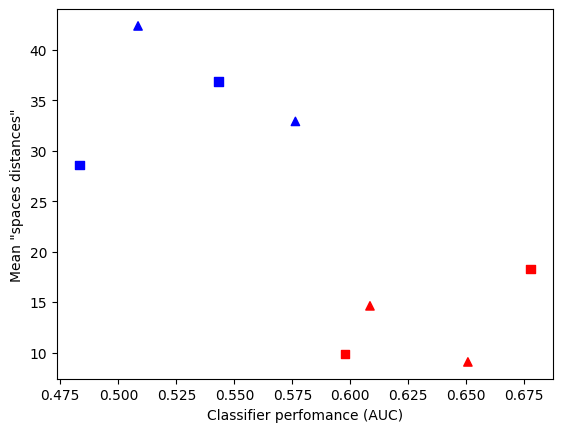

In [33]:
"""# get the df (performance and nn distance)
saved_path = os.path.join(dir_path, "performance_comparisons/nn")
nn_df = pd.read_csv(saved_path+'/mean_median_nn.csv', index_col=0)

perf_df = pd.read_csv(dir_path+'/performance_comparisons/performance_comparison_5000.csv', index_col=0)


shapes = ['^', 's'] # each model type has a shape

# plot
for i,model_type in enumerate(nn_df.columns):
    X = perf_df[model_type].values
    Y = nn_df[model_type].values
    colors = ['r', 'b', 'r', 'b']

    plt.scatter(X, Y, color=colors, marker=shapes[i])


plt.xlabel("Classifier perfomance (AUC)")
plt.ylabel('Mean "spaces distances"')
plt.show()

# C'est le cancer pour faire une légende bien, alors : triangle == convnet, square == densenet2, red == dim 30, blue == dim 4"""